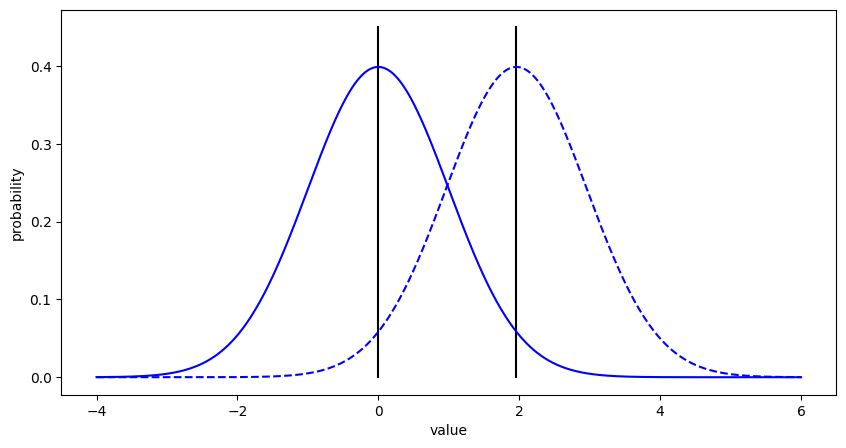

50105 positive outcomes out   of 100000 experiments (50.10 pct)


/var/folders/vk/7ggxn7c560q_d3j227142pcm0000gp/T/ipykernel_46603/1773895207.py:49: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  normalizer          = np.trapz(counts_all, dx=bin_size)


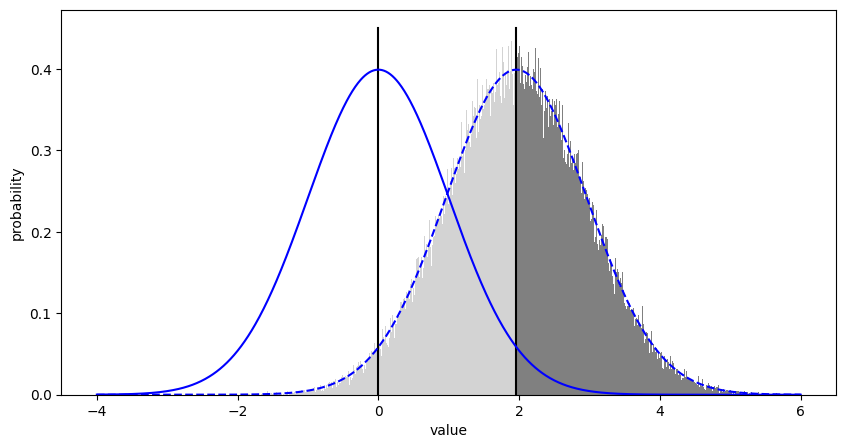

In [3]:
#Exercise 1
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower

# Assume that an original study identified an effect size, 
#   representing the difference in the mean value of a test distribution 
#   versus a null distribution, divided by their common standard deviation 
#   (i.e., the z-score of their difference), at exactly p=0.05. Remember 
#   that these are distributions of mean values, so the standard deviations 
#   of these distributions represent standard errors of the mean. For a 
#   two-tailed test, this p-value implies that 0.975 of the area of the 
#   null distribtion is less than the effect size:
effect_size = st.norm.ppf(0.975)

# We can now reproduce the first panel:
plt.figure(figsize=(10, 5))
mu_0 = 0
sem = 1      # make it easy by assuming sem=1
mu_1 = effect_size*sem
bin_size = 0.01
x_axis = np.arange(-4, 6+bin_size, bin_size)
x_edges = np.arange(x_axis[0]-bin_size/2, x_axis[-1]+bin_size, bin_size)
plt.plot([mu_0, mu_0], [0, 0.45], 'k-')
plt.plot([mu_1, mu_1], [0, 0.45], 'k-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_0, sem), 'b-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_1, sem), 'b--')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()

# Now what happens when we try to replicate the result under the exact 
#   same conditions? Let's simulate N experiments:
N = 100000

# In each simulated experiment, we end up with a mean value that comes 
#   from the experimental distribution, and we only reject the Null 
#   hypothesis if the value is greater than or equal to the previous effect size:
outcomes = np.random.normal(mu_1, sem, N)
outcome_is_positive = outcomes >= effect_size
print(f'{np.count_nonzero(outcome_is_positive)} positive outcomes out \
  of {N} experiments ({np.count_nonzero(outcome_is_positive)/N*100:.2f} pct)')

# We can plot these results as a normalized histogram
counts_no_effect, _ = np.histogram(outcomes[np.logical_not(outcome_is_positive)], bins=x_edges)
counts_effect, _    = np.histogram(outcomes[outcome_is_positive], bins=x_edges)
counts_all, _       = np.histogram(outcomes, bins=x_edges)
normalizer          = np.trapz(counts_all, dx=bin_size)

# Plot it
plt.figure(figsize=(10, 5))
plt.bar(x_axis, counts_no_effect/normalizer, width=0.01, color='lightgray')
plt.bar(x_axis, counts_effect/normalizer, width=0.01, color='gray')
plt.plot([mu_0, mu_0], [0, 0.45], 'k-')
plt.plot([mu_1, mu_1], [0, 0.45], 'k-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_0, sem), 'b-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_1, sem), 'b--')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()

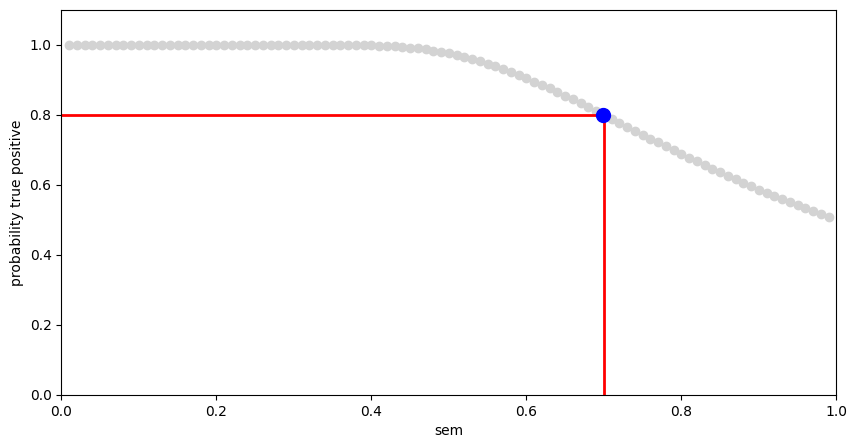

In [4]:
# We can increase the power by increasing the signal-to-noise ratio (SNR) of 
#   our sample, via a reduction in sem and assuming the same mean effect size. 
#   The figure in the paper is confusing, because increasing SNR would narrow 
#   *both* distributions (because we assume that the two hypotheses differ only 
#   by their mean value, not the STD of the distributions). It is the change in 
#   both distributions that explains why you would be less likely to reject the 
#   Null hypothesis for the same effect size under these conditions.
#
# Also note that sem depends on both the number of samples (N) and the STD of 
#   the sampled distribution, so we need to define N or STD to be able to 
#   express sem in terms of the other of those two values.

# We can use a power analysis to find the new sem. The key point is that a 
#   power analysis describes a relationship between the effect size and the 
#   power -- so we can define a particular power to compute the effect size. 
#   In this case, this computation is equivalent to doing a z test with one 
#   sample and a power of 80%, which can be computed as follows (which is 
#   basically computing: what is the mean of a standard normal distribution 
#   that has 80% of its mass >= the cutoff for the null distribution at z=0.975?)
power = 0.8
new_effect_size = st.norm.ppf(0.975) - st.norm.ppf(1-power)

# This effect size is again the z-score, given the same mean difference 
#   as above and the new sem -- so we can use it to compute the new sem:
old_effect_size = st.norm.ppf(0.975)
old_sem = 1
mu_0 = 0
mu_1 = effect_size*old_sem
new_sem = (mu_1-mu_0)/new_effect_size

# To show that this is the case, let's try a bunch of sems and find the 
#   value that corresponds to when 80% of the effect distribution is >= the 
#   p=0.05 cutoff for the null distribution

# Try a bunch of sems, smaller than before (i.e., <1)
sems = np.arange(0.01, 1, 0.01)
vals = np.zeros(np.size(sems))

# Loop through them
for idx, val in enumerate(sems):
   
   # The probability of not rejecting the null hypothesis when the null 
   #  hypothesis is false is the mass of the effect distribution, which still 
   #  has a mean value of effectSize but now has the given sem, that is to the 
   #  right of the new cutoff
   new_cutoff = st.norm.ppf(0.975, mu_0, val)
   vals[idx] = 1 - st.norm.cdf(new_cutoff, effect_size, val) 

# Plot it
plt.figure(figsize=(10, 5))
plt.plot(sems, vals, 'o', color='lightgray')
val_indices = np.flatnonzero(vals<=0.8)
new_sem2 = sems[val_indices[0]]
plt.plot([new_sem2, new_sem2], [0, 0.8], 'r-', linewidth=2)
plt.plot([0, new_sem2], [0.8, 0.8], 'r-', linewidth=2)
plt.plot(new_sem, 0.8, 'bo', markerfacecolor='b', markersize=10)
plt.xlabel('sem')
plt.ylabel('probability true positive')
plt.axis([0, 1, 0, 1.1])
plt.show()

79997 positive outcomes out of   100000 experiments (80.00 pct)


/var/folders/vk/7ggxn7c560q_d3j227142pcm0000gp/T/ipykernel_46603/2303974697.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  normalizer          = np.trapz(counts_all, dx=bin_size)


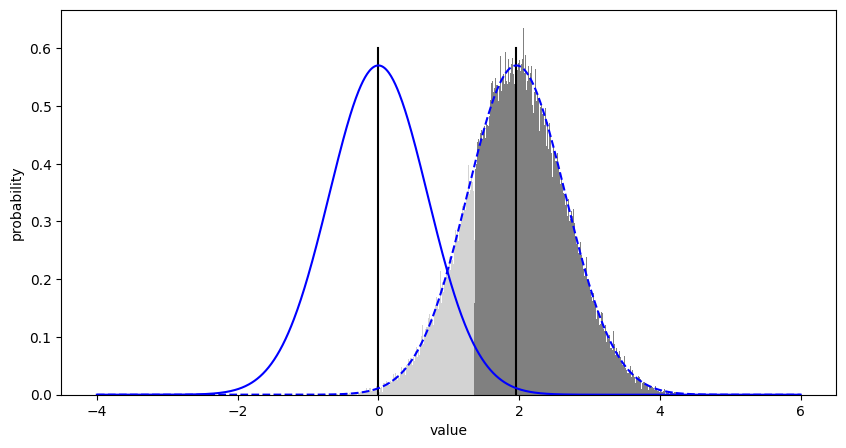

In [5]:
# Now do the simulated experiments as above, but with the new distributions
N = 100000
power = 0.8
new_effect_size = st.norm.ppf(0.975) - st.norm.ppf(1-power)
old_sem = 1
mu_0 = 0
mu_1 = effect_size*old_sem
new_sem = (mu_1-mu_0)/new_effect_size

bin_size = 0.01
x_axis = np.arange(-4, 6+bin_size, bin_size)
x_edges = np.arange(x_axis[0]-bin_size/2, x_axis[-1]+bin_size, bin_size)

outcomes = np.random.normal(mu_1, new_sem, N)
outcome_is_positive = outcomes >= st.norm.ppf(0.975, mu_0, new_sem)
print(f'{np.count_nonzero(outcome_is_positive)} positive outcomes out of \
  {N} experiments ({np.count_nonzero(outcome_is_positive)/N*100:.2f} pct)')

# We can plot these results as a normalized histogram
counts_no_effect, _ = np.histogram(outcomes[np.logical_not(outcome_is_positive)], bins=x_edges)
counts_effect, _    = np.histogram(outcomes[outcome_is_positive], bins=x_edges)
counts_all, _       = np.histogram(outcomes, bins=x_edges)
normalizer          = np.trapz(counts_all, dx=bin_size)

# Plot it
plt.figure(figsize=(10, 5))
plt.bar(x_axis, counts_no_effect/normalizer, width=0.01, color='lightgray')
plt.bar(x_axis, counts_effect/normalizer, width=0.01, color='gray')
plt.plot([mu_0, mu_0], [0, 0.6], 'k-')
plt.plot([mu_1, mu_1], [0, 0.6], 'k-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_0, new_sem), 'b-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_1, new_sem), 'b--')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()


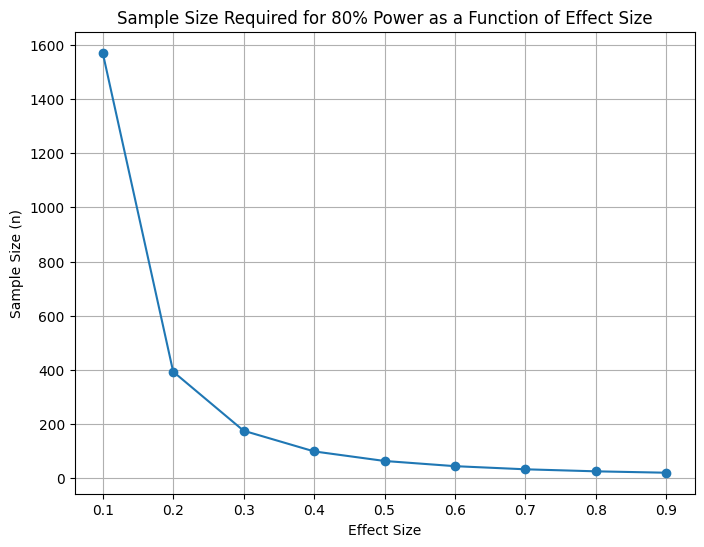

In [6]:
#Exercise 2
#Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, poisson, norm
from statsmodels.stats.power import TTestIndPower

# Function to simulate data and compute correlation
def simulate_data(n_sessions, lc_mean, pupil_mean, pupil_std):
    correlations = []
    for _ in range(n_sessions):
        lc_data = poisson.rvs(mu=lc_mean, size=100)  # Simulated LC activity (Poisson)
        pupil_data = norm.rvs(loc=pupil_mean, scale=pupil_std, size=100)  # Simulated pupil diameter (Gaussian)
        corr, _ = pearsonr(lc_data, pupil_data)  # Compute correlation
        correlations.append(corr)
    return correlations

# Post-hoc power analysis
def post_hoc_power_analysis(effect_sizes, alpha=0.05, power_target=0.8):
    power_analysis = TTestIndPower()
    sample_sizes = []
    for effect_size in effect_sizes:
        sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power_target, alternative='two-sided')
        sample_sizes.append(sample_size)
    return sample_sizes

# Parameters
n_sessions = 100  # Number of experimental sessions
lc_mean = 5       # Mean LC activity for Poisson distribution
pupil_mean = 5    # Mean pupil diameter for Gaussian distribution
pupil_std = 1     # Standard deviation of pupil diameter

# Simulate data
correlations = simulate_data(n_sessions, lc_mean, pupil_mean, pupil_std)

# Effect sizes to analyze (ranging from 0.1 to 0.9)
effect_sizes = np.linspace(0.1, 0.9, 9)

# Perform post-hoc power analysis
sample_sizes = post_hoc_power_analysis(effect_sizes)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(effect_sizes, sample_sizes, marker='o')
plt.xlabel('Effect Size')
plt.ylabel('Sample Size (n)')
plt.title('Sample Size Required for 80% Power as a Function of Effect Size')
plt.grid(True)
plt.show()
